<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-2-Statistics/blob/master/U1S2M2_Assignment_Andrew_Rust_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [2]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-11 01:08:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-04-11 01:08:20 (138 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
voters = pd.read_csv('house-votes-84.data', 
                     header=None,
                     names=column_headers,
                     na_values='?')
voters.head(10)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


In [5]:
# recode votes as numeric
voters = voters.replace({'y':1, 'n':0})
voters.head(3)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [6]:
print(voters.shape)
voters.isnull().sum()

(435, 17)


party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [7]:
voters.dropna(how='any', inplace=True)
print(voters.shape)

(232, 17)


In [8]:
voters.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [9]:
rep = voters[voters['party']=='republican']
rep.shape

(108, 17)

In [10]:
dem = voters[voters['party']=='democrat']
dem.shape

(124, 17)

In [11]:
rep['budget'].mean()

0.1574074074074074

In [12]:
dem['budget'].mean()

0.8548387096774194

In [13]:
rep['budget'].describe()

count    108.000000
mean       0.157407
std        0.365882
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: budget, dtype: float64

In [14]:
dem['budget'].describe()

count    124.000000
mean       0.854839
std        0.353692
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: budget, dtype: float64

In [15]:
# is there a sig difference between the yes votes of democrats and republicans on the budget issue? yes.
# Because our P-value is less than .01 we reject the null hypothesis (that there was no difference in yes votes)
ttest_ind(dem['budget'], rep['budget'])

Ttest_indResult(statistic=14.742943396634677, pvalue=4.458031105913572e-35)

In [16]:
gap = pd.crosstab(voters['party'], voters['budget'])
gap

budget,0.0,1.0
party,,
democrat,18,106
republican,91,17


In [17]:
from scipy.stats import chisquare
chisquare(gap, axis = None)

Power_divergenceResult(statistic=115.06896551724137, pvalue=8.896864668535607e-25)

####My Observation: So I would say they're dependent because there is a high chi square

In [0]:
 # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

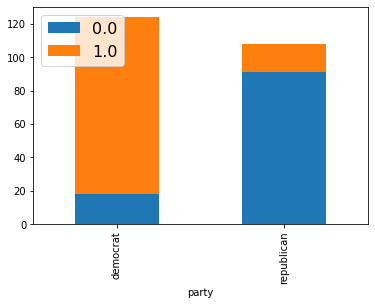

In [19]:
# Would like to come back and change colors and title to show "No" and "Yes"

gap.plot.bar(stacked=True)
# Below legend is confusing.
# plt.legend(['Blue is NO on Budget.'], fontsize = 14, loc = 'upper center') 
plt.legend(fontsize = 16, loc = 'upper left')
plt.show()

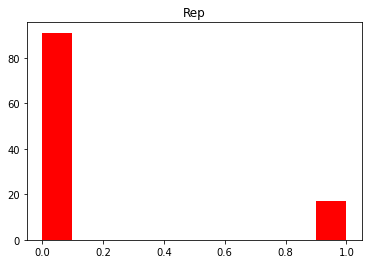

In [20]:
plt.hist(rep['budget'], color= 'red')
plt.title("Rep")
plt.show();

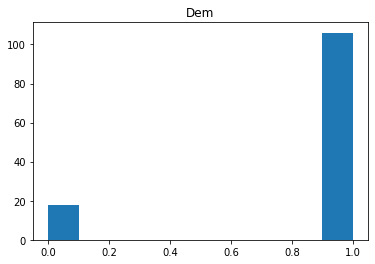

In [21]:
plt.hist(dem['budget'])
plt.title("Dem")
plt.show();

In [0]:
rep_df = rep.describe()

In [23]:
rep_df

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.212963,0.472222,0.157407,0.990741,0.953704,0.870370,0.268519,0.148148,0.138889,0.574074,0.157407,0.851852,0.842593,0.981481,0.111111,0.666667
std,0.411310,0.501555,0.365882,0.096225,0.211106,0.337461,0.445255,0.356903,0.347443,0.496788,0.365882,0.356903,0.365882,0.135445,0.315735,0.473602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# create an array of the means for each republican vote.
rep_means = rep_df.iloc[1][0:16].values
rep_means

array([0.21296296, 0.47222222, 0.15740741, 0.99074074, 0.9537037 ,
       0.87037037, 0.26851852, 0.14814815, 0.13888889, 0.57407407,
       0.15740741, 0.85185185, 0.84259259, 0.98148148, 0.11111111,
       0.66666667])

##1. Generate and numerically represent a confidence interval


In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [0]:
def conf_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    # Stderr is the standard error
    # to calculate stderr it's the std deviation divided by the square root of the sample (length)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr*stats.t.ppf((1 + confidence)/2.0, n-1)
    # Just want the three below not the moe because it works for the graph that way.
    return (mean, mean-moe, mean+moe) # mean, upper bound, lower bound.
    # return (mean, moe, mean-moe, mean+moe) # mean, moe, upper bound, lower bound.

In [27]:
# Republican vote on budget.
# This is correct
conf_interval(rep['budget'])

(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)

##2. Graphically (with a plot) represent the confidence interval

In [28]:
rep['budget'].shape

(108,)

In [29]:
# It eliminated a lot of the null values by deleting the whole row so that's why it starts at 8.
# First row that had all votes accounted for.
rep['budget'].head()

8     0.0
28    0.0
30    0.0
33    0.0
35    0.0
Name: budget, dtype: float64

(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)


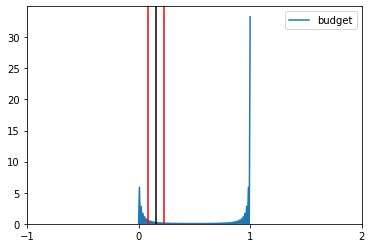

In [30]:
# kernel density estimate
sns.kdeplot(rep['budget'])
CI = conf_interval(rep['budget'])
# CI[0] = mean
# CI[1] = mean - moe
# CI[2] = mean + moe
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
plt.xticks(np.arange(-1, 3, step=1))
print(CI)

In [31]:
no_df = rep[rep['budget']==0.0]
no_df.shape

(91, 17)

In [32]:
yes_df = rep[rep['budget']==1.0]
yes_df.shape

(17, 17)

In [33]:
rep['budget'] = rep['budget'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
my_array = []

In [0]:
# gets the array numbers that I need for the Routes I need 
for ind in rep.index:
  my_array.append(rep['budget'][ind])

In [36]:
print(my_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [37]:
# should be 108
len(my_array)

108

##Below is right but it's not graphing the curve with the counts over the zero which there were more zero counts (No's) from the republicans


(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)


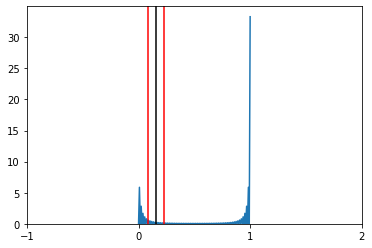

In [38]:
# kernel density estimate
sns.kdeplot(my_array)
CI = conf_interval(my_array)
# CI[0] = mean
# CI[1] = mean - moe
# CI[2] = mean + moe
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
plt.xticks(np.arange(-1, 3, step=1))
print(CI)

(0.47619047619047616, 0.3186697206427547, 0.6337112317381977)


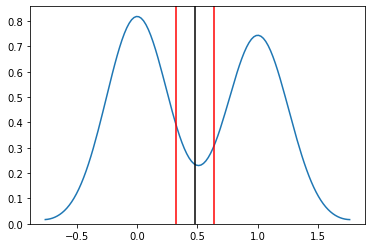

In [39]:
# fake data - one sample of 42 coin flips
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
# kernel density estimate

sns.kdeplot(coinflips_42)
CI = conf_interval(coinflips_42)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
print(CI)

In [40]:
rep['budget'].mean()

0.1574074074074074

In [41]:
# calculate a 95% conf interval on either side of this
conf_int = stats.t.interval(0.95, # alpha,
                            rep.shape[0], # sample length
                            loc = rep['budget'].mean(),
                            scale = stats.sem(rep['budget']) # std err of mean
                            
                            )
conf_int

(0.08762094648337333, 0.2271938683314415)

##3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# ABOVE DEFINITELY FALLS INSIDE THE TWO
# we are 95% conf that the voting mean falls between .087 and .228 for the yes votes on the budget issue

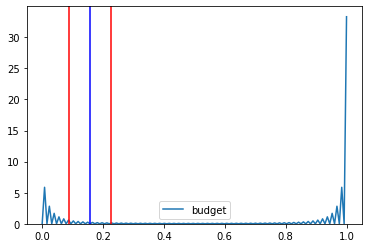

In [43]:
# plot on a graph
sns.kdeplot(rep['budget'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=rep['budget'].mean(), color='blue');

In [0]:
source_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"

In [0]:
iowa_df = pd.read_csv(source_url)

In [46]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
iowa_df['YearBuilt'].dtype

dtype('int64')

In [48]:
iowa_df['YearBuilt'].value_counts(sort = True, ascending = True)

1872     1
1917     1
1913     1
1911     1
1906     1
        ..
2003    45
2007    49
2004    54
2005    64
2006    67
Name: YearBuilt, Length: 112, dtype: int64

In [49]:
# just the non-numeric columns (ie, categorical)
iowa_df.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [50]:
iowa_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [0]:
# create some binned categories 
cut_points = [1850, 1889, 1929, 1959, 1999, 2029]
label_names = ['1850-1889', '1890-1929', '1930-1959', '1960-1999', '2000-2020']
iowa_df['year_built_categories'] = pd.cut(iowa_df['YearBuilt'], cut_points, labels=label_names)



In [52]:
# Keep the variable name the same because you're appending a new row
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_built_categories
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2000-2020
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1960-1999
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2000-2020
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1890-1929
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2000-2020


In [53]:
iowa_df['year_built_categories'].value_counts()

1960-1999    587
2000-2020    388
1930-1959    300
1890-1929    176
1850-1889      9
Name: year_built_categories, dtype: int64

In [0]:
iowa_df = iowa_df.sort_values(by= 'year_built_categories', ascending=True)

In [55]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_built_categories
991,992,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,8,9,1882,1986,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,BLQ,216,Unf,0,700,916,GasA,...,SBrkr,916,826,0,1742,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Attchd,1925.0,Unf,2,424,TA,TA,P,0,169,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000,1850-1889
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,780,780,GasA,...,SBrkr,780,240,0,1020,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000,1850-1889
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1470,1470,GasA,...,SBrkr,1675,1818,0,3493,0,0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003.0,Unf,3,870,TA,TA,Y,302,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000,1850-1889
1132,1133,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,4,1880,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1008,1008,GasW,...,SBrkr,1178,1032,0,2210,0,0,2,0,5,1,Fa,8,Typ,0,NaN,Detchd,1930.0,Unf,1,205,Fa,TA,N,0,48,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500,1850-1889
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,...,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979,1850-1889


In [56]:
contigency_table = pd.crosstab(iowa_df['GarageFinish'], iowa_df['year_built_categories'], margins = True)
contigency_table
# Fin = Finished
# RFn = Rough Finished
# Unf = Unfinished

year_built_categories,1850-1889,1890-1929,1930-1959,1960-1999,2000-2020,All
GarageFinish,,,,,,
Fin,0,6,24,139,183,352
RFn,0,6,45,194,177,422
Unf,7,134,206,233,25,605
All,7,146,275,566,385,1379


In [57]:
finished_garage = contigency_table.iloc[0][0:5].values
finished_garage

array([  0,   6,  24, 139, 183])

In [58]:
rough_finished_garage = contigency_table.iloc[1][0:5].values
rough_finished_garage

array([  0,   6,  45, 194, 177])

In [59]:
Unfinished_garage = contigency_table.iloc[2][0:5].values
Unfinished_garage

array([  7, 134, 206, 233,  25])

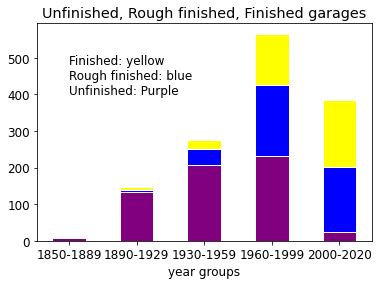

In [60]:
# libraries
import matplotlib.pyplot as plt
from matplotlib import rc

 
# y-axis in bold
rc('font', weight='light', size=12)
 
# Values of each group are in arrays above
 
# Heights of bars1 + bars2
types_garages = np.add(Unfinished_garage, rough_finished_garage).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['1850-1889', '1890-1929', '1930-1959', '1960-1999', '2000-2020']
barWidth = .5
 
# Create brown bars
plt.bar(r, Unfinished_garage, color='purple', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, rough_finished_garage, bottom=Unfinished_garage, color='blue', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, finished_garage, bottom=types_garages, color='yellow', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='light', fontsize = '12')
plt.xlabel("year groups")
plt.title("Unfinished, Rough finished, Finished garages")
plt.text(s = "Finished: yellow\nRough finished: blue\nUnfinished: Purple", x= 0, y=400)
# Show graphic
plt.show()


## Above Graph shows that more modern built homes have finished garages in yellow.  

####Data stopped after 2006 so slightly skewed with a higher total count for 1960 - 1999.

#4. CHI - Squared statistic with NUMPY

In [61]:
# I know contingency is spelled wrong

# row sums goes to the 6th column and prints 0-2 parts those rows
row_sums = contigency_table.iloc[0:3, 5].values
# col sums goes down to the 3rd row and prints all the columns from that row 0-4
col_sums = contigency_table.iloc[3, 0:5].values

print(row_sums)
print(col_sums)

[352 422 605]
[  7 146 275 566 385]


In [62]:
Sum = sum(row_sums)
Sum

1379

In [63]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/Sum
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 5)
[[  1.78680203  37.26758521  70.19579405 144.47570703  98.27411168]
 [  2.14213198  44.67875272  84.15518492 173.2066715  117.81725888]
 [  3.07106599  64.05366207 120.64902103 248.31762146 168.90862944]]


In [64]:
observed = pd.crosstab(iowa_df['GarageFinish'], iowa_df['year_built_categories']).values
print(observed.shape)
observed

(3, 5)


array([[  0,   6,  24, 139, 183],
       [  0,   6,  45, 194, 177],
       [  7, 134, 206, 233,  25]])

In [65]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")


Chi-Squared: 483.0858617850501


#The Chi-Squared and everything MATCHES BELOW!

In [67]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)

# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 8


# CHI - Squared with Scipy

In [68]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 483.0858617850501
P-value: 2.9886481708721896e-99
Degrees of Freedom: 8
Expected: 
 [[  1.78680203  37.26758521  70.19579405 144.47570703  98.27411168]
 [  2.14213198  44.67875272  84.15518492 173.2066715  117.81725888]
 [  3.07106599  64.05366207 120.64902103 248.31762146 168.90862944]]


### Null Hypothesis: The Year Built is independent of Garage Style.

### Due to a p-value of 0, we REJECT the null hypothesis that the year a house was built and style of garage are independent, and CONCLUDE that there is an association between both.

##CHI - Squared with a second categorical veriable
## Ran Sci-py first and then the Numpy way second
### BOTH MATCH EACH OTHER - WORKS!

In [76]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [77]:
iowa_df['SaleCondition'].shape

(1460,)

In [80]:
iowa_df['SaleCondition'].dtype

dtype('O')

In [69]:
iowa_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [75]:
iowa_df['OverallCond'].value_counts(sort = True, ascending = False).head(10)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [78]:
iowa_df['OverallCond'].shape

(1460,)

In [79]:
iowa_df['OverallCond'].dtype

dtype('int64')

In [0]:
observed=pd.crosstab(iowa_df['SaleCondition'], iowa_df['OverallCond']).values

### With Sci-Py

In [82]:
# chi square test
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 137.55985115904573
P-value: 1.2393483603234845e-12
Degrees of Freedom: 40
Expected: 
 [[6.91780822e-02 3.45890411e-01 1.72945205e+00 3.94315068e+00
  5.67952055e+01 1.74328767e+01 1.41815068e+01 4.98082192e+00
  1.52191781e+00]
 [2.73972603e-03 1.36986301e-02 6.84931507e-02 1.56164384e-01
  2.24931507e+00 6.90410959e-01 5.61643836e-01 1.97260274e-01
  6.02739726e-02]
 [8.21917808e-03 4.10958904e-02 2.05479452e-01 4.68493151e-01
  6.74794521e+00 2.07123288e+00 1.68493151e+00 5.91780822e-01
  1.80821918e-01]
 [1.36986301e-02 6.84931507e-02 3.42465753e-01 7.80821918e-01
  1.12465753e+01 3.45205479e+00 2.80821918e+00 9.86301370e-01
  3.01369863e-01]
 [8.20547945e-01 4.10273973e+00 2.05136986e+01 4.67712329e+01
  6.73669863e+02 2.06778082e+02 1.68212329e+02 5.90794521e+01
  1.80520548e+01]
 [8.56164384e-02 4.28082192e-01 2.14041096e+00 4.88013699e+00
  7.02910959e+01 2.15753425e+01 1.75513699e+01 6.16438356e+00
  1.88356164e+00]]


### Null Hypothesis: The Sale Condition is independent of the Overall Condition.

### Due to a p-value of 0, we REJECT the null hypothesis that the Sale Condition and Overall Condition of the house are independent, and CONCLUDE that there is an association between both.

In [83]:
contingency_table = pd.crosstab(iowa_df['SaleCondition'], iowa_df['OverallCond'], margins = True)
contingency_table

OverallCond,1,2,3,4,5,6,7,8,9,All
SaleCondition,,,,,,,,,,
Abnorml,0,2,5,5,51,18,19,0,1,101
AdjLand,0,0,1,0,2,1,0,0,0,4
Alloca,0,0,1,1,7,1,2,0,0,12
Family,0,0,0,2,13,2,2,1,0,20
Normal,1,2,18,49,628,227,182,70,21,1198
Partial,0,1,0,0,120,3,0,1,0,125
All,1,5,25,57,821,252,205,72,22,1460


## With Numpy

In [87]:
# I know contingency is spelled wrong

# row sums goes to the 6th column and prints 0-2 parts those rows
row_sums = contingency_table.iloc[0:6, 9].values
# col sums goes down to the 3rd row and prints all the columns from that row 0-4
col_sums = contingency_table.iloc[6, 0:9].values

print(row_sums)
print(col_sums)

[ 101    4   12   20 1198  125]
[  1   5  25  57 821 252 205  72  22]


In [88]:
# Should be 1460
Sum = sum(row_sums)
Sum

1460

In [90]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/Sum
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)


(6, 9)
[[6.91780822e-02 3.45890411e-01 1.72945205e+00 3.94315068e+00
  5.67952055e+01 1.74328767e+01 1.41815068e+01 4.98082192e+00
  1.52191781e+00]
 [2.73972603e-03 1.36986301e-02 6.84931507e-02 1.56164384e-01
  2.24931507e+00 6.90410959e-01 5.61643836e-01 1.97260274e-01
  6.02739726e-02]
 [8.21917808e-03 4.10958904e-02 2.05479452e-01 4.68493151e-01
  6.74794521e+00 2.07123288e+00 1.68493151e+00 5.91780822e-01
  1.80821918e-01]
 [1.36986301e-02 6.84931507e-02 3.42465753e-01 7.80821918e-01
  1.12465753e+01 3.45205479e+00 2.80821918e+00 9.86301370e-01
  3.01369863e-01]
 [8.20547945e-01 4.10273973e+00 2.05136986e+01 4.67712329e+01
  6.73669863e+02 2.06778082e+02 1.68212329e+02 5.90794521e+01
  1.80520548e+01]
 [8.56164384e-02 4.28082192e-01 2.14041096e+00 4.88013699e+00
  7.02910959e+01 2.15753425e+01 1.75513699e+01 6.16438356e+00
  1.88356164e+00]]


In [91]:
observed = pd.crosstab(iowa_df['SaleCondition'], iowa_df['OverallCond']).values
print(observed.shape)
observed

(6, 9)


array([[  0,   2,   5,   5,  51,  18,  19,   0,   1],
       [  0,   0,   1,   0,   2,   1,   0,   0,   0],
       [  0,   0,   1,   1,   7,   1,   2,   0,   0],
       [  0,   0,   0,   2,  13,   2,   2,   1,   0],
       [  1,   2,  18,  49, 628, 227, 182,  70,  21],
       [  0,   1,   0,   0, 120,   3,   0,   1,   0]])

## Works!!

In [92]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 137.55985115904573


In [93]:
# Degrees of Freedom of a Chi-squared test

#degrees_of_freedom = (num_rows - 1)(num_columns - 1)

# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 40


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)